In [266]:
import numpy as np
import keras
import scipy.stats as stats
import pylab as pl
from matplotlib import pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [185]:
origin_data = np.loadtxt("data.txt")

In [187]:
data = origin_data
data.shape

(10580, 181)

In [134]:
dataX = data[:,0:-1]
dataY = data[:,-1]
dataY = dataY.reshape(-1,1)

# Some stats

max: 21472.926260118013 
min: 0.04991243502339581 
mean: 344.4511560060772 
std: 625.2633153192716


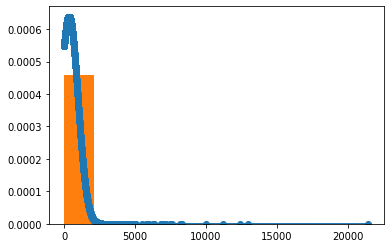

In [114]:
sorted_mir = -np.sort(-dataY)
print("max:", max(sorted_mir),"\nmin:", min(sorted_mir), "\nmean:", sorted_mir.mean(), "\nstd:", sorted_mir.std())
fit_mir = stats.norm.pdf(sorted_mir, np.mean(sorted_mir), np.std(sorted_mir))
pl.plot(sorted_mir, fit_mir, '-o')
pl.hist(sorted_mir, density=True)
pl.show()

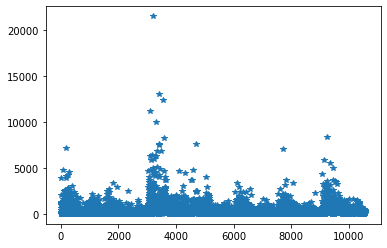

In [116]:
plt.plot(dataY, "*")

In [184]:
mir_zscore = np.abs(stats.zscore(dataY))
print(mir_zscore)
outliers_zscore = np.where(mir_zscore > 3)
print(outliers_zscore)
print(len(outliers_zscore[0]))

[[5.60279884]
 [2.78897127]
 [0.40389807]
 ...
 [0.37960693]
 [0.16216429]
 [0.24599199]]
(array([   0,   66,  110,  138,  140,  141,  147,  169,  170,  175,  207,
        234,  237,  241,  270,  279,  280,  322,  325,  390,  448, 1607,
       1658, 1681, 1686, 1797, 1952, 2330, 3020, 3021, 3048, 3052, 3054,
       3056, 3059, 3060, 3063, 3071, 3079, 3080, 3081, 3082, 3086, 3122,
       3130, 3141, 3158, 3161, 3166, 3167, 3189, 3190, 3193, 3194, 3195,
       3197, 3210, 3211, 3213, 3227, 3230, 3234, 3236, 3254, 3257, 3261,
       3299, 3300, 3306, 3344, 3345, 3346, 3406, 3407, 3408, 3409, 3410,
       3412, 3461, 3463, 3464, 3469, 3524, 3538, 3563, 3571, 3579, 3595,
       3607, 3610, 3618, 3621, 3624, 3626, 3627, 3638, 4089, 4221, 4229,
       4307, 4532, 4564, 4598, 4678, 4700, 4701, 4706, 4738, 5026, 5048,
       5081, 6043, 6109, 6184, 6218, 6323, 6432, 6561, 7622, 7731, 7790,
       7836, 8051, 8842, 9067, 9068, 9095, 9129, 9133, 9169, 9177, 9208,
       9236, 9237, 9242, 9252, 92

In [211]:
dataX = origin_data[:,0:-1]
dataY = origin_data[:,-1]
dataY = dataY.reshape(-1,1)

In [212]:
dataX_drop = np.delete(dataX, outliers_zscore[0], axis=0)
dataY_drop = np.delete(dataY, outliers_zscore[0], axis=0)

In [213]:
dataX = dataX_drop
dataY = dataY_drop

In [214]:
dataX.shape

(10428, 180)

max: 2219.373481882368 
min: 0.04991243502339581 
mean: 292.8973937355639 
std: 359.5003189990006


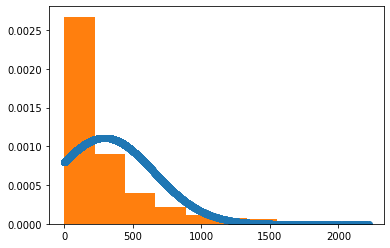

In [222]:
sorted_mir = -np.sort(-dataY[:,0])
print("max:", max(sorted_mir),"\nmin:", min(sorted_mir), "\nmean:", sorted_mir.mean(), "\nstd:", sorted_mir.std())
fit_mir = stats.norm.pdf(sorted_mir, np.mean(sorted_mir), np.std(sorted_mir))
pl.plot(sorted_mir, fit_mir, '-o')
pl.hist(sorted_mir, density=True)
pl.show()

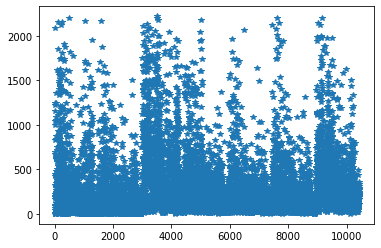

In [219]:
plt.plot(dataY, "*")

# Neural Network

In [241]:
# generate training set and test set
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size = 0.33, shuffle = True)

In [242]:
# z-score scale (z = (x-u)/s)
scaler_trainX = preprocessing.StandardScaler().fit(trainX)
trainX_scaled = scaler_trainX.transform(trainX)
testX_scaled = scaler_trainX.transform(testX)

scaler_trainY = preprocessing.StandardScaler().fit(trainY)
trainY_scaled = scaler_trainY.transform(trainY)
testY_scaled = scaler_trainY.transform(testY)

In [225]:
# min-max scale (x-x_min)/(x_max-x_min) * (max-min) + min
scaler_trainX = preprocessing.MinMaxScaler().fit(trainX)
trainX_scaled = scaler_trainX.transform(trainX)
testX_scaled = scaler_trainX.transform(testX)

scaler_trainY = preprocessing.MinMaxScaler().fit(trainY)
trainY_scaled = scaler_trainY.transform(trainY)
testY_scaled = scaler_trainY.transform(testY)

In [268]:
def NN_model():
    dropout_rate = 0.3
    
    model = Sequential()
    model.add(Dense(64, activation = "elu", input_dim = 180))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation = "elu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss = "mean_squared_error", optimizer = "adam") 
    return model

In [270]:
seed = 0
np.random.seed(seed)
estimator = KerasRegressor(build_fn=NN_model, epochs = 100, batch_size = 32)

In [273]:
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(estimator, trainX_scaled, trainY_scaled, cv=kfold)

Epoch 1/100
3493/3493 [==============================] - 3s 716us/step - loss: 0.8755
Epoch 2/100
3493/3493 [==============================] - 0s 103us/step - loss: 0.8060
Epoch 3/100
3493/3493 [==============================] - 0s 113us/step - loss: 0.7735
Epoch 4/100
3493/3493 [==============================] - 0s 108us/step - loss: 0.7585
Epoch 5/100
3493/3493 [==============================] - 0s 113us/step - loss: 0.7467
Epoch 6/100
3493/3493 [==============================] - 0s 113us/step - loss: 0.7387
Epoch 7/100
3493/3493 [==============================] - 0s 111us/step - loss: 0.7426
Epoch 8/100
3493/3493 [==============================] - 0s 114us/step - loss: 0.7412
Epoch 9/100
3493/3493 [==============================] - 0s 113us/step - loss: 0.7318
Epoch 10/100
3493/3493 [==============================] - 0s 110us/step - loss: 0.7184
Epoch 11/100
3493/3493 [==============================] - 0s 116us/step - loss: 0.7154
Epoch 12/100
3493/3493 [============================

3493/3493 [==============================] - 0s 104us/step - loss: 0.5277
Epoch 96/100
3493/3493 [==============================] - 0s 110us/step - loss: 0.5104
Epoch 97/100
3493/3493 [==============================] - 0s 102us/step - loss: 0.4905
Epoch 98/100
3493/3493 [==============================] - 0s 111us/step - loss: 0.5365
Epoch 99/100
3493/3493 [==============================] - 0s 103us/step - loss: 0.5120
Epoch 100/100
3493/3493 [==============================] - 1s 254us/step
Epoch 1/100
3493/3493 [==============================] - 3s 770us/step - loss: 0.8627
Epoch 2/100
3493/3493 [==============================] - 0s 101us/step - loss: 0.7808
Epoch 3/100
3493/3493 [==============================] - 0s 98us/step - loss: 0.7587
Epoch 4/100
3493/3493 [==============================] - 0s 102us/step - loss: 0.7206
Epoch 5/100
3493/3493 [==============================] - 0s 100us/step - loss: 0.7371
Epoch 6/100
3493/3493 [==============================] - 0s 98us/step - loss

3493/3493 [==============================] - 0s 103us/step - loss: 0.5209
Epoch 89/100
3493/3493 [==============================] - 0s 100us/step - loss: 0.5041
Epoch 90/100
3493/3493 [==============================] - 0s 102us/step - loss: 0.4927
Epoch 91/100
3493/3493 [==============================] - 0s 101us/step - loss: 0.5046
Epoch 92/100
3493/3493 [==============================] - 0s 105us/step - loss: 0.4902
Epoch 93/100
3493/3493 [==============================] - 0s 104us/step - loss: 0.4890
Epoch 94/100
3493/3493 [==============================] - 0s 115us/step - loss: 0.4880
Epoch 95/100
3493/3493 [==============================] - 0s 110us/step - loss: 0.4966
Epoch 96/100
3493/3493 [==============================] - 0s 108us/step - loss: 0.4891
Epoch 97/100
3493/3493 [==============================] - 0s 103us/step - loss: 0.4935
Epoch 98/100
3493/3493 [==============================] - 0s 109us/step - loss: 0.4914
Epoch 99/100
3493/3493 [==============================] 

In [247]:
dropout_rate = 0.4
activation_function = "elu" # elu, relu, sigmoid, tanh, linear, softmax

input_dim = trainX_scaled.shape[0]
model = Sequential()
model.add(Dense(64, activation = "elu", input_dim = 180))
model.add(Dropout(dropout_rate))
model.add(Dense(32, activation = "elu"))
model.add(Dropout(dropout_rate))
model.add(Dense(16, activation = "elu"))
model.add(Dropout(dropout_rate))
model.add(Dense(8, activation = "elu"))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation = "elu"))
model.compile(loss = "mean_squared_error", optimizer = "adam") 
# mean_absolute_error, mean_squared_error;
# SGD, adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
train_history = model.fit(x = trainX_scaled, y = trainY_scaled, 
                                    epochs = 500, batch_size = 32, 
                                    validation_data = (testX_scaled, testY_scaled))

Train on 6986 samples, validate on 3442 samples
Epoch 1/500
6986/6986 [==============================] - 3s 384us/step - loss: 1.1737 - val_loss: 0.7711
Epoch 2/500
6986/6986 [==============================] - 1s 104us/step - loss: 0.9412 - val_loss: 0.7168
Epoch 3/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.8726 - val_loss: 0.7219
Epoch 4/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.8380 - val_loss: 0.7148
Epoch 5/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.7992 - val_loss: 0.7076
Epoch 6/500
6986/6986 [==============================] - 1s 106us/step - loss: 0.7870 - val_loss: 0.7038
Epoch 7/500
6986/6986 [==============================] - 1s 110us/step - loss: 0.7714 - val_loss: 0.6975
Epoch 8/500
6986/6986 [==============================] - 1s 109us/step - loss: 0.7609 - val_loss: 0.6930
Epoch 9/500
6986/6986 [==============================] - 1s 110us/step - loss: 0.7553 - val_loss: 0.6889
Epoch 1

Epoch 78/500
6986/6986 [==============================] - 1s 115us/step - loss: 0.6087 - val_loss: 0.6507
Epoch 79/500
6986/6986 [==============================] - 1s 116us/step - loss: 0.6244 - val_loss: 0.6624
Epoch 80/500
6986/6986 [==============================] - 1s 113us/step - loss: 0.6097 - val_loss: 0.6602
Epoch 81/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.6093 - val_loss: 0.6544
Epoch 82/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.5968 - val_loss: 0.6568
Epoch 83/500
6986/6986 [==============================] - 1s 115us/step - loss: 0.6084 - val_loss: 0.6590
Epoch 84/500
6986/6986 [==============================] - 1s 110us/step - loss: 0.6108 - val_loss: 0.6604
Epoch 85/500
6986/6986 [==============================] - 1s 107us/step - loss: 0.6036 - val_loss: 0.6639
Epoch 86/500
6986/6986 [==============================] - 1s 108us/step - loss: 0.6078 - val_loss: 0.6547
Epoch 87/500
6986/6986 [======================

Epoch 155/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5575 - val_loss: 0.6586
Epoch 156/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5431 - val_loss: 0.6668
Epoch 157/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5529 - val_loss: 0.6619
Epoch 158/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.5608 - val_loss: 0.6732
Epoch 159/500
6986/6986 [==============================] - 1s 99us/step - loss: 0.5509 - val_loss: 0.6720
Epoch 160/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5514 - val_loss: 0.6677
Epoch 161/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5547 - val_loss: 0.6739
Epoch 162/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5466 - val_loss: 0.6711
Epoch 163/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5506 - val_loss: 0.6700
Epoch 164/500
6986/6986 [=====================

Epoch 232/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5111 - val_loss: 0.6764
Epoch 233/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5395 - val_loss: 0.6744
Epoch 234/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.5096 - val_loss: 0.6827
Epoch 235/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5194 - val_loss: 0.6840
Epoch 236/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5116 - val_loss: 0.6891
Epoch 237/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5193 - val_loss: 0.6920
Epoch 238/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.5150 - val_loss: 0.6819
Epoch 239/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5259 - val_loss: 0.6890
Epoch 240/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5222 - val_loss: 0.6846
Epoch 241/500
6986/6986 [=====================

Epoch 309/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.5139 - val_loss: 0.6755
Epoch 310/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.5108 - val_loss: 0.6850
Epoch 311/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.5065 - val_loss: 0.7036
Epoch 312/500
6986/6986 [==============================] - 1s 99us/step - loss: 0.5191 - val_loss: 0.6811
Epoch 313/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5086 - val_loss: 0.6761
Epoch 314/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.5068 - val_loss: 0.6966
Epoch 315/500
6986/6986 [==============================] - 1s 99us/step - loss: 0.5007 - val_loss: 0.6960
Epoch 316/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.4971 - val_loss: 0.7024
Epoch 317/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.5028 - val_loss: 0.6865
Epoch 318/500
6986/6986 [=====================

Epoch 386/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.4911 - val_loss: 0.7073
Epoch 387/500
6986/6986 [==============================] - 1s 96us/step - loss: 0.4913 - val_loss: 0.6971
Epoch 388/500
6986/6986 [==============================] - 1s 103us/step - loss: 0.4882 - val_loss: 0.7000
Epoch 389/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.4971 - val_loss: 0.7140
Epoch 390/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.4896 - val_loss: 0.7037
Epoch 391/500
6986/6986 [==============================] - 1s 99us/step - loss: 0.4823 - val_loss: 0.6909
Epoch 392/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.4857 - val_loss: 0.6932
Epoch 393/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.4988 - val_loss: 0.6944
Epoch 394/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.4805 - val_loss: 0.6957
Epoch 395/500
6986/6986 [====================

Epoch 463/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.4736 - val_loss: 0.7094
Epoch 464/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.4677 - val_loss: 0.7066
Epoch 465/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.4773 - val_loss: 0.6993
Epoch 466/500
6986/6986 [==============================] - 1s 97us/step - loss: 0.4792 - val_loss: 0.6991
Epoch 467/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.4633 - val_loss: 0.7213
Epoch 468/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.4736 - val_loss: 0.7105
Epoch 469/500
6986/6986 [==============================] - 1s 95us/step - loss: 0.4573 - val_loss: 0.7325
Epoch 470/500
6986/6986 [==============================] - 1s 94us/step - loss: 0.4800 - val_loss: 0.6974
Epoch 471/500
6986/6986 [==============================] - 1s 98us/step - loss: 0.4781 - val_loss: 0.7162
Epoch 472/500
6986/6986 [=====================

In [248]:
trainY_scaled

array([[-0.04047812],
       [-0.63458916],
       [ 3.52464784],
       ...,
       [-0.763928  ],
       [-0.40809255],
       [-0.57536002]])

In [249]:
print("max:", max(trainY_scaled), "\nmin:", min(trainY_scaled), 
      "\nmean:", trainY_scaled.mean(), "\nstd:", trainY_scaled.std())

max: [5.34236892] 
min: [-0.8114849] 
mean: -8.035052408395064e-17 
std: 0.9999999999999999


In [250]:
predict_trainX_scaled = model.predict(trainX_scaled)

In [251]:
predict_trainX_scaled

array([[-0.32577246],
       [-0.53293574],
       [ 2.933111  ],
       ...,
       [-0.6270032 ],
       [ 0.09475538],
       [-0.5050781 ]], dtype=float32)

In [252]:
print("max:", max(predict_trainX_scaled), "\nmin:", min(predict_trainX_scaled), 
      "\nmean:", predict_trainX_scaled.mean(), "\nstd:", predict_trainX_scaled.std())

max: [3.3492422] 
min: [-0.88560104] 
mean: -0.06717907 
std: 0.7234606


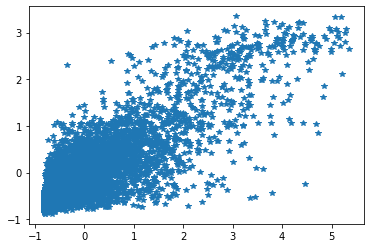

In [253]:
plt.plot(trainY_scaled, predict_trainX_scaled, "*" )
plt.show()

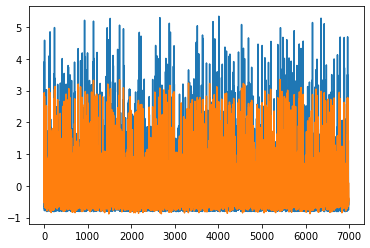

In [254]:
plt.plot(trainY_scaled)
plt.plot(predict_trainX_scaled)
plt.show()

In [255]:
testY_scaled

array([[-0.70751463],
       [ 1.12116341],
       [ 0.69557116],
       ...,
       [-0.54605899],
       [-0.35529555],
       [ 0.13545672]])

In [256]:
print("max:", max(testY_scaled), "\nmin:", min(testY_scaled), 
      "\nmean:", testY_scaled.mean(), "\nstd:", testY_scaled.std())

max: [5.29654931] 
min: [-0.81047038] 
mean: 0.0016286110669528886 
std: 0.9903970802634675


In [257]:
predict_testX_scaled = model.predict(testX_scaled)

In [258]:
predict_testX_scaled

array([[-0.67498755],
       [ 0.2732326 ],
       [-0.25526005],
       ...,
       [-0.22856683],
       [ 0.7614492 ],
       [-0.12942141]], dtype=float32)

In [259]:
print("max:", max(predict_testX_scaled), "\nmin:", min(predict_testX_scaled), 
      "\nmean:", predict_testX_scaled.mean(), "\nstd:", predict_testX_scaled.std())

max: [3.3678648] 
min: [-0.8847312] 
mean: -0.097041555 
std: 0.6332375


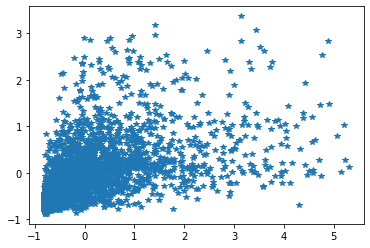

In [260]:
plt.plot(testY_scaled, predict_testX_scaled, "*" )
plt.show()

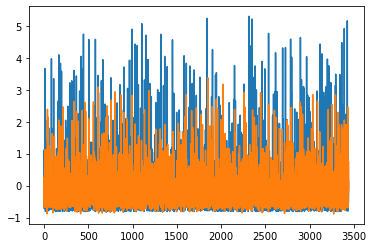

In [261]:
plt.plot(testY_scaled)
plt.plot(predict_testX_scaled)
plt.show()

In [262]:
# save model
model.save("model.h5")

In [263]:
# read model
model = keras.models.load_model('model.h5')

In [264]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 64)                11584     
_________________________________________________________________
dropout_92 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_93 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_94 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 136       
__________

In [ ]:
def NN():
    trainX = None
    trainY = None
    testX = None
    testY = None
    model = None
    score = None
    
    def __init__ (self,
                  dropout_layer_rate = 0.1,
                  rnn_dropout_rate = 0.1,
                  nb_epoch = 50,
                  batch_size = 16,
                  loss = 'mean_absolute_error',
                  optimizer = 'adam',
                  save_model = True,
                  save_model_path = ''):

        self.dropout_layer_rate = dropout_layer_rate
        self.rnn_dropout_rate = rnn_dropout_rate
        self.nb_epoch = nb_epoch
        self.batch_size = batch_size
        self.loss = loss
        self.optimizer = optimizer #rmsprop, adam
        self.save_model = save_model
        self.save_model_path = save_model_path
        
    def NN_getData(self, trainX, trainY, testX, testY):
        self.trainX = trainX
        self.trainY = trainY
        self.testX = testX
        self.testY = testY

        return True
    
    def NN_model_train(self):
        trainX = self.trainX
        trainY = self.trainY
        testX = self.testX
        testY = self.testY
        model = self.model
        dropout_layer_rate = self.dropout_layer_rate
        rnn_dropout_rate = self.rnn_dropout_rate
        
        input_dim = trainX.shape
        
        model = Sequential()
        model.add()